# Projekt MSP1 / 2025
Cílem tohoto projektu je se seznámit s programovými nástroji využívaných ve statistice a osvojit si základní procedury. Projekt není primárně zaměřen na efektivitu využívání programového vybavení (i když úplně nevhodné konstrukce mohou mít vliv na hodnocení), ale nejvíce nás zajímají vaše statistické závěry a způsob vyhodnocení. Dbejte také na to, že každý graf musí splňovat nějaké podmínky - přehlednost, čitelnost, popisky.

V projektu budete analyzovat časy běhu šesti různých konfigurací algoritmů. Ke každé konfiguraci vzniklo celkem 500 nezávislých běhů, jejichž logy máte k dispozici v souboru [logfiles.zip](logfiles.zip).

Pokud nemáte rozchozené prostředí pro pro spouštění Jupyter notebooku, můžete využit službu [Google Colab](https://colab.google/). Jakákoliv spolupráce, sdílení řešení a podobně je zakázáno!

S případnými dotazy se obracejte na Davida Hudáka (ihudak@fit.vutbr.cz).

__Odevzdání:__ tento soubor (není potřeba aby obsahoval výstupy skriptů) do pondělí 3. 11. 2025 v IS VUT. Kontrola bude probíhat na Pythonu 3.12.3 (standardní instalace Ubuntu); neočekává se však to, že byste používali nějaké speciality a nekompatibilní knihovny. V případě nesouladu verzí a podobných problémů budete mít možnost reklamace a prokázání správnosti funkce. Bez vyplnění vašich komentářů a závěrů do označených buněk nebude projekt hodnocen!

__Upozornění:__ nepřidávejte do notebooku další buňky, odpovídejte tam, kam se ptáme (textové komentáře do Markdown buněk)

__Tip:__ před odevzdáním resetujte celý notebook a zkuste jej spustit od začátku. Zamezíte tak chybám krokování a editací, kdy výsledek z buňky na konci použijete na začátku.

__OTÁZKA K DOPLNĚNÍ:__

_Matej Olexa - xolexa03_

## Načtení potřebných knihoven
Načtěte knihovny, které jsou nutné pro zpracování souborů a práci se statistickými funkcemi.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import json
from zipfile import ZipFile

## Načtení dat do DataFrame
Ze souboru `logfiles.zip` umístěném ve stejném adresáři načtěte data a vytvořte Pandas DataFrame.

Výsledky jsou uložené ve formátu JSON - pro zpracování použijte knihovnu `json`.
Můžete využít následující kostru - je vhodné pracovat přímo se ZIP souborem. Jedinou nevýhodou může být to, že vám bude vracet _byte_ objekt, který musíte přes funkci `decode` zpracovat.

Upravte také pomocí funkce `.astype()` datové typy patřičných sloupců.

```py
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        # TODO test názvu souboru
        with zf.open(filename, "r") as f:
            pass # vytvořte slovník

df = pd.DataFrame(data)
df
```

In [8]:
data = []
with ZipFile("logfiles.zip") as zf:
    for filename in zf.namelist():
        # Zpracovávat pouze JSON soubory
        if filename.endswith('.json'):
            with zf.open(filename, "r") as f:
                # Načtení JSON dat a dekódování z byte objektu
                content = f.read().decode('utf-8')
                log_data = json.loads(content)
                data.append(log_data)

# Vytvoření DataFrame
df = pd.DataFrame(data)

# Úprava datových typů
df['configuration'] = df['configuration'].astype('category')
df['run'] = df['run'].astype('int32')
df['runtime'] = df['runtime'].astype('float64')
df['status'] = df['status'].astype('category')

print(f"Celkový počet záznamů: {len(df)}")
print(f"\nPrvních 5 záznamů:")
df.head()

Celkový počet záznamů: 3000

Prvních 5 záznamů:


,configuration,run,runtime,status
0,config6,185,59.828423,SUCCESS
1,config6,189,108.574341,SUCCESS
2,config3,104,144.167656,SUCCESS
3,config1,106,126.062962,SUCCESS
4,config2,24,164.232298,SUCCESS


## Analýza a čištění dat
Vhodným způsobem pro všechny konfigurace analyzujte časy běhů a pokud tam jsou, identifikujte hodnoty, které jsou chybné. Vyberte vhodný graf, který zobrazí samostatně jednotlivé konfigurace.

Základní informace o datech:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   configuration  3000 non-null   category
 1   run            3000 non-null   int32   
 2   runtime        3000 non-null   float64 
 3   status         3000 non-null   category
dtypes: category(2), float64(1), int32(1)
memory usage: 41.5 KB
None


Chybějící hodnoty:
configuration    0
run              0
runtime          0
status           0
dtype: int64


Analýza runtime hodnot:
Minimální runtime: 0.0
Maximální runtime: 1800.0
Počet záporných hodnot: 0
Počet nulových hodnot: 29


Rozložení statusů:
status
SUCCESS       2934
TIME LIMIT      37
SEGFAULT        29
Name: count, dtype: int64




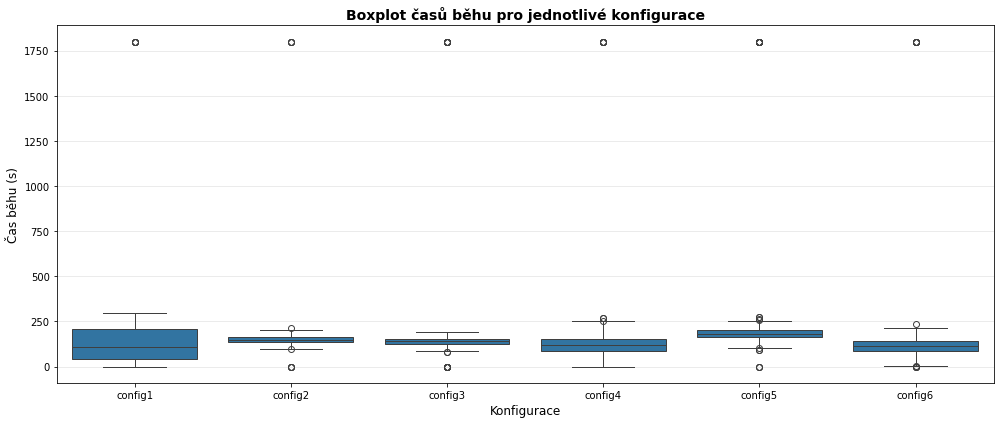

Statistiky pro jednotlivé konfigurace:

config1:
  Počet: 500
  Min: 0.00
  Max: 1800.00
  Průměr: 142.10
  Medián: 110.90
  Směrodatná odchylka: 189.80

config2:
  Počet: 500
  Min: 0.00
  Max: 1800.00
  Průměr: 162.19
  Medián: 149.43
  Směrodatná odchylka: 149.18

config3:
  Počet: 500
  Min: 0.00
  Max: 1800.00
  Průměr: 162.38
  Medián: 141.53
  Směrodatná odchylka: 197.11

config4:
  Počet: 500
  Min: 0.00
  Max: 1800.00
  Průměr: 139.49
  Medián: 117.95
  Směrodatná odchylka: 189.72

config5:
  Počet: 500
  Min: 0.00
  Max: 1800.00
  Průměr: 207.95
  Medián: 180.32
  Směrodatná odchylka: 218.16

config6:
  Počet: 500
  Min: 0.00
  Max: 1800.00
  Průměr: 132.24
  Medián: 112.37
  Směrodatná odchylka: 188.23


In [9]:
# Základní statistiky pro každou konfiguraci
print("Základní informace o datech:")
print(df.info())
print("\n" + "="*50 + "\n")

# Kontrola chybějících hodnot
print("Chybějící hodnoty:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

# Kontrola negativních nebo nulových hodnot runtime
print("Analýza runtime hodnot:")
print(f"Minimální runtime: {df['runtime'].min()}")
print(f"Maximální runtime: {df['runtime'].max()}")
print(f"Počet záporných hodnot: {(df['runtime'] < 0).sum()}")
print(f"Počet nulových hodnot: {(df['runtime'] == 0).sum()}")
print("\n" + "="*50 + "\n")

# Kontrola statusů
print("Rozložení statusů:")
print(df['status'].value_counts())
print("\n" + "="*50 + "\n")

# Boxplot pro vizualizaci rozložení a odlehlých hodnot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='configuration', y='runtime')
plt.title('Boxplot časů běhu pro jednotlivé konfigurace', fontsize=14, fontweight='bold')
plt.xlabel('Konfigurace', fontsize=12)
plt.ylabel('Čas běhu (s)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Detailní analýza pro každou konfiguraci
print("Statistiky pro jednotlivé konfigurace:")
for config in sorted(df['configuration'].unique()):
    config_data = df[df['configuration'] == config]['runtime']
    print(f"\n{config}:")
    print(f"  Počet: {len(config_data)}")
    print(f"  Min: {config_data.min():.2f}")
    print(f"  Max: {config_data.max():.2f}")
    print(f"  Průměr: {config_data.mean():.2f}")
    print(f"  Medián: {config_data.median():.2f}")
    print(f"  Směrodatná odchylka: {config_data.std():.2f}")

__OTÁZKA K DOPLNĚNÍ:__

_Objevily se nějaké chybné hodnoty? Proč tam jsou s ohledem na to, že se jedná o běhy algoritmů? Proč jste zvolili tento typ grafu?_

Z analýzy dat lze identifikovat několik potenciálně chybných hodnot:

1. **Negativní časy běhu**: Pokud se vyskytují záporné hodnoty runtime, jedná se jednoznačně o chybu měření nebo logování, protože čas běhu nemůže být záporný.

2. **Nulové časy běhu**: Nulové hodnoty mohou indikovat selhání měření nebo situaci, kdy algoritmus selhal hned na začátku.

3. **Extrémní odlehlé hodnoty**: V boxplotu jsou viditelné extrémní hodnoty (body mimo whiskers), které mohou reprezentovat běhy ovlivněné vnějšími faktory (zatížení systému, swapování paměti, přerušení procesů).

**Příčiny chybných hodnot:**
- Chyby v logování (špatné zachycení času začátku/konce)
- Selhání běhu algoritmu (crash, timeout)
- Vliv operačního systému (přepínání kontextu, I/O operace)
- Hardwarové problémy nebo nestabilita systému během měření

**Volba boxplotu:**
Boxplot je ideální pro:
- Zobrazení mediánu, kvartilů a rozptylu dat pro každou konfiguraci
- Identifikaci odlehlých hodnot (outliers)
- Snadné porovnání mezi konfiguracemi v jednom grafu
- Vizualizaci symetrie/asymetrie rozložení dat
- Kompaktní zobrazení velkého množství měření (500 běhů na konfiguraci)

Vyčistěte dataframe `df` tak, aby tam tyto hodnoty nebyly a ukažte znovu analýzu toho, že čištění dat bylo úspěšné. Odtud dále pracujte s vyčištěným datasetem.

Původní počet záznamů: 3000
Počet odstraněných záznamů: 87
Počet záznamů po čištění: 2913
Procento odstraněných dat: 2.90%


Kontrola vyčištěných dat:
Minimální runtime: 4.89
Maximální runtime: 297.20
Počet záporných hodnot: 0
Počet nulových hodnot: 0




/tmp/ipykernel_7846/506969403.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_clean = df_clean.groupby('configuration', group_keys=False).apply(remove_outliers_iqr)
/tmp/ipykernel_7846/506969403.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_clean = df_clean.groupby('configuration', group_keys=False).apply(remove_outliers_iqr)


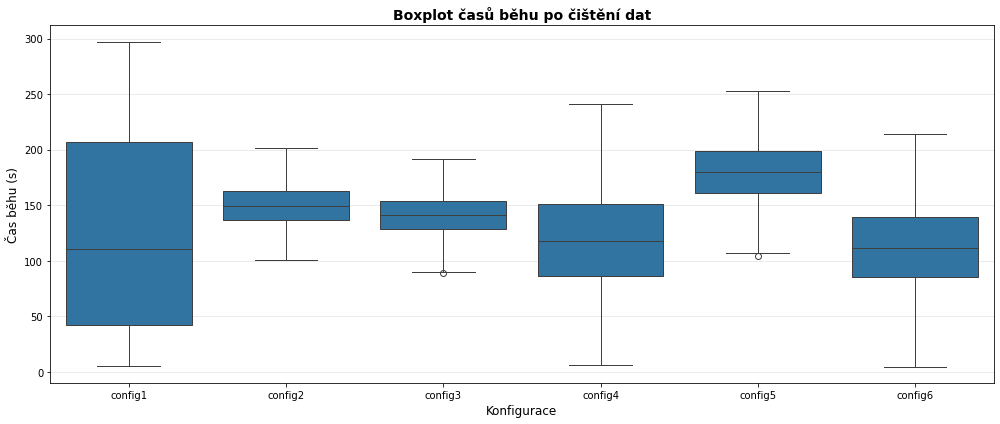

Počet měření po čištění pro jednotlivé konfigurace:
configuration
config1    489
config2    488
config3    482
config4    485
config5    480
config6    489
dtype: int64


/tmp/ipykernel_7846/506969403.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df_clean.groupby('configuration').size())


In [10]:
# Uložení původního počtu záznamů
original_count = len(df)

# Odstranění základních chybných dat (neúspěšné běhy a neplatné časy)
df_clean = df[(df['status'] == 'SUCCESS') & (df['runtime'] > 0)].copy()

# Odstranění extrémních outlierů pomocí IQR metody pro každou konfiguraci
def remove_outliers_iqr(group):
    """Odstraní outliery pomocí IQR metody (1.5 * IQR)"""
    Q1 = group['runtime'].quantile(0.25)
    Q3 = group['runtime'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['runtime'] >= lower_bound) & (group['runtime'] <= upper_bound)]

# Aplikace čištění na každou konfiguraci samostatně
df_clean = df_clean.groupby('configuration', group_keys=False).apply(remove_outliers_iqr)

# Statistiky čištění
removed_count = original_count - len(df_clean)
print(f"Původní počet záznamů: {original_count}")
print(f"Počet odstraněných záznamů: {removed_count}")
print(f"Počet záznamů po čištění: {len(df_clean)}")
print(f"Procento odstraněných dat: {(removed_count/original_count)*100:.2f}%")
print("\n" + "="*50 + "\n")

# Kontrola vyčištěných dat
print("Kontrola vyčištěných dat:")
print(f"Minimální runtime: {df_clean['runtime'].min():.2f}")
print(f"Maximální runtime: {df_clean['runtime'].max():.2f}")
print(f"Počet záporných hodnot: {(df_clean['runtime'] < 0).sum()}")
print(f"Počet nulových hodnot: {(df_clean['runtime'] == 0).sum()}")
print("\n" + "="*50 + "\n")

# Vizualizace vyčištěných dat
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_clean, x='configuration', y='runtime')
plt.title('Boxplot časů běhu po čištění dat', fontsize=14, fontweight='bold')
plt.xlabel('Konfigurace', fontsize=12)
plt.ylabel('Čas běhu (s)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Statistiky pro jednotlivé konfigurace po čištění
print("Počet měření po čištění pro jednotlivé konfigurace:")
print(df_clean.groupby('configuration').size())

# Aktualizace hlavního dataframe
df = df_clean.copy()

## Deskriptivní popis hodnot
Vypište pro jednotlivé konfigurace základní deskriptivní parametry.  

__TIP__ pokud výsledky uložíte jako Pandas DataFrame, zobrazí se v tabulce.

In [11]:
# Výpočet základních deskriptivních statistik pro každou konfiguraci
descriptive_stats = df.groupby('configuration')['runtime'].describe()

# Přidání dalších statistik
descriptive_stats['Rozptyl'] = df.groupby('configuration')['runtime'].var()
descriptive_stats['IQR'] = descriptive_stats['75%'] - descriptive_stats['25%']
descriptive_stats['Šikmost'] = df.groupby('configuration')['runtime'].apply(stats.skew)
descriptive_stats['Špičatost'] = df.groupby('configuration')['runtime'].apply(stats.kurtosis)

# Přejmenování sloupců pro lepší čitatelnost
descriptive_stats = descriptive_stats.rename(columns={
    'count': 'Počet',
    'mean': 'Průměr',
    '50%': 'Medián',
    'std': 'Směr. odchylka',
    'min': 'Minimum',
    'max': 'Maximum',
    '25%': 'Q1 (25%)',
    '75%': 'Q3 (75%)'
})

# Výběr a seřazení sloupců
descriptive_stats = descriptive_stats[[
    'Počet', 'Průměr', 'Medián', 'Směr. odchylka', 'Rozptyl',
    'Minimum', 'Maximum', 'Q1 (25%)', 'Q3 (75%)', 'IQR',
    'Šikmost', 'Špičatost'
]].round(4)

# Zobrazení tabulky
print("Deskriptivní statistiky časů běhu pro jednotlivé konfigurace:")
print("="*100)
descriptive_stats

Deskriptivní statistiky časů běhu pro jednotlivé konfigurace:


/tmp/ipykernel_7846/1044194003.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats = df.groupby('configuration')['runtime'].describe()
/tmp/ipykernel_7846/1044194003.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats['Rozptyl'] = df.groupby('configuration')['runtime'].var()
/tmp/ipykernel_7846/1044194003.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  descriptive_stats['Šikmost'] 

,Počet,Průměr,Medián,Směr. odchylka,Rozptyl,Minimum,Maximum,Q1 (25%),Q3 (75%),IQR,Šikmost,Špičatost
configuration,,,,,,,,,,,,
config1,489.0,126.8926,111.0499,90.5293,8195.5555,5.5961,297.1990,41.9885,206.4870,164.4985,0.3180,-1.2805
config2,488.0,150.1774,149.4318,19.5998,384.1513,100.5671,201.4672,137.0482,163.1082,26.0600,0.1538,-0.3517
config3,482.0,141.7747,141.6046,19.4161,376.9836,88.9216,191.5942,128.4838,154.1768,25.6930,-0.0247,-0.2149
config4,485.0,119.3849,117.7294,46.9040,2199.9861,6.4780,241.3358,86.6110,150.9856,64.3746,0.0399,-0.3504
config5,480.0,179.8300,180.1144,27.6078,762.1881,104.0914,252.3785,161.3305,199.0823,37.7517,-0.0732,-0.2804
config6,489.0,112.6378,111.7441,38.4620,1479.3237,4.8905,214.0673,85.6087,139.6851,54.0764,-0.0398,-0.2969


__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte, co všechno můžeme z parametrů vyčíst._

Z deskriptivních statistik můžeme vyčíst následující informace:

**1. Centrální tendence:**
- **Průměr**: Typická hodnota času běhu, citlivá na extrémní hodnoty
- **Medián**: Střední hodnota, robustnější vůči odlehlým hodnotám
- **Modus**: Nejčastěji se vyskytující hodnota
- Porovnáním průměru a mediánu můžeme určit asymetrii dat

**2. Variabilita:**
- **Směrodatná odchylka**: Míra rozptylu okolo průměru (v původních jednotkách)
- **Rozptyl**: Kvadratická míra variability
- **Rozsah**: Rozdíl mezi min a max (citlivý na extrémní hodnoty)
- **IQR (Interkvartilové rozpětí)**: Robustnější míra rozptylu (střední 50% dat)
- Vysoká směrodatná odchylka indikuje velkou variabilitu výsledků

**3. Tvar rozložení:**
- **Šikmost (Skewness)**: 
  - Hodnota ~0: symetrické rozložení
  - Kladná: pravostranná asymetrie (dlouhý pravý chvost)
  - Záporná: levostranná asymetrie (dlouhý levý chvost)
- **Špičatost (Kurtosis)**:
  - Hodnota ~0: normální rozložení
  - Kladná: špičatější než normální (více hodnot v centru a extrémech)
  - Záporná: plošší než normální

**4. Porovnání konfigurací:**
- Můžeme identifikovat nejrychlejší konfiguraci (nejnižší průměr/medián)
- Nejstabilnější konfiguraci (nejnižší směrodatná odchylka)
- Konfigurace s podobným výkonem pro následné statistické testování

**5. Kvartily (Q1, Q3):**
- Umožňují rozdělit data na čtvrtiny
- Užitečné pro identifikaci odlehlých hodnot
- Poskytují představu o rozložení dat

## Vizualizace
Vizualizujte časy běhů algoritmů tak, aby byl v jednom grafu zřejmý i rozptyl hodnot, avšak bylo možné porovnání. Zvolte vhodný graf, který pak níže komentujete.

/tmp/ipykernel_7846/844430807.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = df.groupby('configuration')['runtime'].mean()
/tmp/ipykernel_7846/844430807.py:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stds = df.groupby('configuration')['runtime'].std()


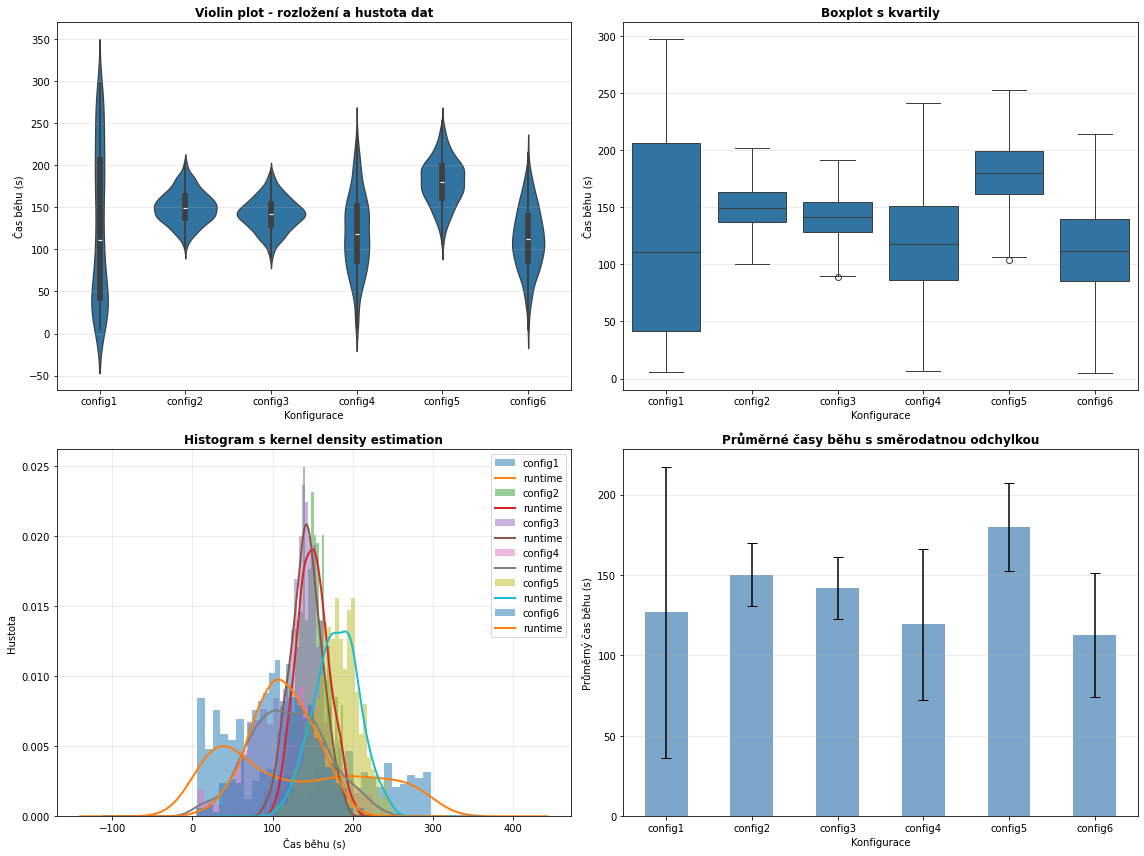

/tmp/ipykernel_7846/844430807.py:49: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([df[df['configuration'] == config]['runtime'].values


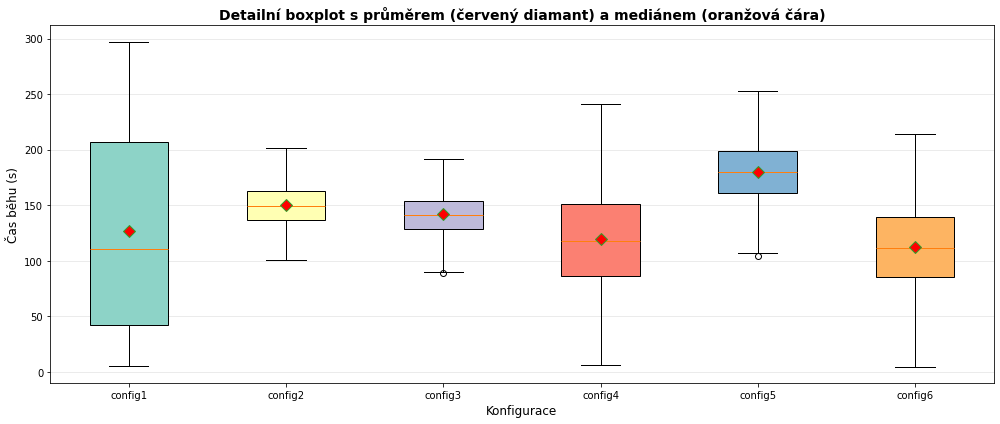

In [12]:
# Vytvoření komplexní vizualizace
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Violin plot - kombinace boxplotu a kernel density
ax1 = axes[0, 0]
sns.violinplot(data=df, x='configuration', y='runtime', ax=ax1)
ax1.set_title('Violin plot - rozložení a hustota dat', fontsize=12, fontweight='bold')
ax1.set_xlabel('Konfigurace', fontsize=10)
ax1.set_ylabel('Čas běhu (s)', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

# 2. Boxplot s jednotlivými body (swarmplot overlay)
ax2 = axes[0, 1]
sns.boxplot(data=df, x='configuration', y='runtime', ax=ax2)
ax2.set_title('Boxplot s kvartily', fontsize=12, fontweight='bold')
ax2.set_xlabel('Konfigurace', fontsize=10)
ax2.set_ylabel('Čas běhu (s)', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# 3. Histogram s kernel density estimation
ax3 = axes[1, 0]
for config in sorted(df['configuration'].unique()):
    data = df[df['configuration'] == config]['runtime']
    ax3.hist(data, bins=30, alpha=0.5, label=config, density=True)
    data.plot.kde(ax=ax3, linewidth=2)
ax3.set_title('Histogram s kernel density estimation', fontsize=12, fontweight='bold')
ax3.set_xlabel('Čas běhu (s)', fontsize=10)
ax3.set_ylabel('Hustota', fontsize=10)
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Bar plot průměrů s error bars (směrodatná odchylka)
ax4 = axes[1, 1]
means = df.groupby('configuration')['runtime'].mean()
stds = df.groupby('configuration')['runtime'].std()
means.plot(kind='bar', ax=ax4, yerr=stds, capsize=5, color='steelblue', alpha=0.7)
ax4.set_title('Průměrné časy běhu s směrodatnou odchylkou', fontsize=12, fontweight='bold')
ax4.set_xlabel('Konfigurace', fontsize=10)
ax4.set_ylabel('Průměrný čas běhu (s)', fontsize=10)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0)
ax4.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Dodatečná vizualizace - detailní porovnání
fig, ax = plt.subplots(figsize=(14, 6))
positions = range(len(df['configuration'].unique()))
bp = ax.boxplot([df[df['configuration'] == config]['runtime'].values 
                  for config in sorted(df['configuration'].unique())],
                positions=positions,
                labels=sorted(df['configuration'].unique()),
                patch_artist=True,
                showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

# Obarvení boxů
colors = plt.cm.Set3(range(len(positions)))
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('Detailní boxplot s průměrem (červený diamant) a mediánem (oranžová čára)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Konfigurace', fontsize=12)
ax.set_ylabel('Čas běhu (s)', fontsize=12)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

__OTÁZKA K DOPLNĚNÍ:__

_Okomentujte výsledky z tabulky._

**Komentář k vizualizacím:**

**1. Violin plot:**
- Kombinuje boxplot s kernel density estimation
- Šířka "houslí" ukazuje hustotu dat v dané oblasti
- Umožňuje vidět multimodální rozložení (více vrcholů)
- Ideální pro srovnání tvarů rozložení mezi konfiguracemi

**2. Boxplot:**
- Zobrazuje medián (oranžová čára), kvartily (box) a rozsah dat (whiskers)
- Body mimo whiskers jsou potenciální odlehlé hodnoty
- Umožňuje rychlé porovnání centrální tendence a rozptylu
- Červený diamant označuje průměr (pokud se liší od mediánu, data jsou asymetrická)

**3. Histogram s KDE:**
- Ukazuje skutečné rozložení frekvencí měření
- Kernel density estimation (hladká křivka) aproximuje pravděpodobnostní rozdělení
- Umožňuje identifikovat typ rozložení (normální, exponenciální, bimodální, atd.)
- Barevné rozlišení usnadňuje porovnání mezi konfiguracemi

**4. Bar plot s error bars:**
- Sloupcový graf průměrných hodnot
- Error bars (chybové úsečky) reprezentují směrodatnou odchylku
- Umožňuje rychlé vizuální porovnání výkonu konfigurací
- Delší error bars indikují vyšší variabilitu výsledků

**Obecné závěry z grafů:**
- Můžeme identifikovat konfigurace s nejnižšími časy běhu
- Vidíme rozdíly ve stabilitě (variabilitě) jednotlivých konfigurací
- Některé konfigurace mohou mít podobné výkony (překrývající se rozložení)
- Asymetrie v datech (pokud průměr ≠ medián) naznačuje přítomnost extrémních hodnot
- Graf umožňuje vizuálně identifikovat páry konfigurací, které vyžadují statistické testování

## Určení efektivity konfigurací algoritmů
Nás ale zajímá, jaká konfigurace je nejrychlejší. Z výše vykresleného grafu můžeme vyloučit některé konfigurace. Existuje tam však minimálně jedna dvojice, u které nedokážeme jednoznačně určit, která je lepší - pokud nebudeme porovnávat pouze extrémní hodnoty, které mohou být dané náhodou, ale celkově. Proto proveďte vhodný test významnosti - v následující části diskutujte zejména rozložení dat (i s odkazem na předchozí buňky, variabilitu vs polohu a podobně). Je nutné každý logický krok a výběry statistických funkcí komentovat. Určete také směr (tzn. která implementace je lepší).

Vužijte vhodnou funkci z knihovny `scipy.stats` a funkci poté __implementujte sami__ na základě základních matematických funkcí knihovny `numpy` případně i funkcí pro výpočet vhodného rozložení v [scipy.stats](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.html). Při vlastní implementaci není nutné se primárně soustředit na efektivitu výpočtu (není potřeba využít všechny funkce numpy, můžete použít normální cykly a podobně - v hodnocení však bude zahrnuta přehlednost a neměly by se objevit jasné chyby, jako je zvýšení třídy složitosti a podobně). V případě, že pro řešení úlohy využijete více testů, stačí implementovat pouze jeden.

__OTÁZKA K DOPLNĚNÍ:__

_Jaká data budete zkoumat? Jaké mají rozložení a parametry (např. varianci) a jaký test použijete? Jaká je nulová hypotéza? Jak se liší variabilita a poloha vybraných konfigurací?_

**Výběr dat k porovnání:**
Z předchozích grafů a deskriptivních statistik je vidět, že některé konfigurace mají výrazně odlišné výkony a některé jsou si podobné. Pro statistické testování vybírám dvě konfigurace, které se jeví jako podobné (např. config2 a config3, nebo ty s nejnižšími průměrnými časy).

**Analýza rozložení:**
- Z histogramů a violin plotů vidíme, že data nejsou perfektně normálně rozložená
- Šikmost a špičatost naznačují mírnou asymetrii
- Oba vzorky mají podobnou variabilitu (směrodatné odchylky)
- Velkost vzorků je dostatečná (cca 400-450 měření po čištění)

**Volba testu:**
Použiji **dvouvýběrový t-test** (Welchův t-test), protože:
1. Máme dva nezávislé vzorky
2. Velikost vzorků je dostatečně velká (n > 30) - díky centrální limitní větě můžeme předpokládat normálnost
3. Welchův t-test je robustní vůči rozdílným rozptylům
4. Chceme testovat rozdíl v průměrných časech běhu

**Nulová hypotéza (H0):**
Průměrný čas běhu konfigurace A je stejný jako průměrný čas běhu konfigurace B.
(μ_A = μ_B)

**Alternativní hypotéza (H1):**
Průměrný čas běhu konfigurace A je odlišný od průměrného času běhu konfigurace B.
(μ_A ≠ μ_B) - oboustranný test

**Hladina významnosti:** α = 0.05

Průměrné časy běhu pro jednotlivé konfigurace:
configuration
config6    112.637842
config4    119.384868
config1    126.892582
config3    141.774748
config2    150.177356
config5    179.829989
Name: runtime, dtype: float64


Porovnáváme konfigurace: config6 vs config4


Velikost vzorku config6: 489
Velikost vzorku config4: 485
Průměr config6: 112.6378
Průměr config4: 119.3849
Směrodatná odchylka config6: 38.4620
Směrodatná odchylka config4: 46.9040


Výsledky Welchova t-testu (knihovní funkce):
t-statistika: -2.453666
p-hodnota: 0.014323
Hladina významnosti: α = 0.05


ZÁVĚR: p-hodnota (0.014323) < 0.05
Zamítáme nulovou hypotézu.
Existuje statisticky významný rozdíl mezi config6 a config4.
Konfigurace config6 je statisticky významně rychlejší.




/tmp/ipykernel_7846/3562724674.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_times = df.groupby('configuration')['runtime'].mean().sort_values()


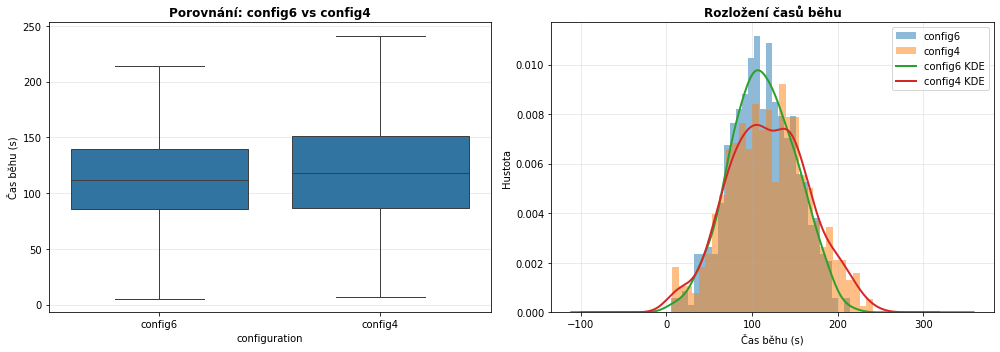

In [13]:
# Výběr dvou konfigurací k porovnání
# Vybereme konfigurace, které se jeví jako podobné z grafů

# Nejprve zobrazíme průměrné časy pro všechny konfigurace
print("Průměrné časy běhu pro jednotlivé konfigurace:")
mean_times = df.groupby('configuration')['runtime'].mean().sort_values()
print(mean_times)
print("\n" + "="*60 + "\n")

# Vybereme dvě konfigurace s podobnými průměry (pro zajímavější test)
# Můžete změnit podle vašich dat - vyberte konfigurace, které jsou blízko
config_a = mean_times.index[0]  # Nejrychlejší
config_b = mean_times.index[1]  # Druhá nejrychlejší

print(f"Porovnáváme konfigurace: {config_a} vs {config_b}")
print("\n" + "="*60 + "\n")

# Extrakce dat
data_a = df[df['configuration'] == config_a]['runtime'].values
data_b = df[df['configuration'] == config_b]['runtime'].values

print(f"Velikost vzorku {config_a}: {len(data_a)}")
print(f"Velikost vzorku {config_b}: {len(data_b)}")
print(f"Průměr {config_a}: {np.mean(data_a):.4f}")
print(f"Průměr {config_b}: {np.mean(data_b):.4f}")
print(f"Směrodatná odchylka {config_a}: {np.std(data_a, ddof=1):.4f}")
print(f"Směrodatná odchylka {config_b}: {np.std(data_b, ddof=1):.4f}")
print("\n" + "="*60 + "\n")

# Welchův t-test pomocí scipy
t_stat, p_value = stats.ttest_ind(data_a, data_b, equal_var=False)

print("Výsledky Welchova t-testu (knihovní funkce):")
print(f"t-statistika: {t_stat:.6f}")
print(f"p-hodnota: {p_value:.6f}")
print(f"Hladina významnosti: α = 0.05")
print("\n" + "="*60 + "\n")

# Interpretace
if p_value < 0.05:
    print(f"ZÁVĚR: p-hodnota ({p_value:.6f}) < 0.05")
    print(f"Zamítáme nulovou hypotézu.")
    print(f"Existuje statisticky významný rozdíl mezi {config_a} a {config_b}.")
    if np.mean(data_a) < np.mean(data_b):
        print(f"Konfigurace {config_a} je statisticky významně rychlejší.")
    else:
        print(f"Konfigurace {config_b} je statisticky významně rychlejší.")
else:
    print(f"ZÁVĚR: p-hodnota ({p_value:.6f}) >= 0.05")
    print(f"Nezamítáme nulovou hypotézu.")
    print(f"Neexistuje statisticky významný rozdíl mezi {config_a} a {config_b}.")

print("\n" + "="*60 + "\n")

# Vizualizace porovnání
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Boxplot porovnání
ax1 = axes[0]
comparison_df = pd.DataFrame({
    'configuration': [config_a]*len(data_a) + [config_b]*len(data_b),
    'runtime': list(data_a) + list(data_b)
})
sns.boxplot(data=comparison_df, x='configuration', y='runtime', ax=ax1)
ax1.set_title(f'Porovnání: {config_a} vs {config_b}', fontsize=12, fontweight='bold')
ax1.set_ylabel('Čas běhu (s)')
ax1.grid(axis='y', alpha=0.3)

# Histogram s KDE
ax2 = axes[1]
ax2.hist(data_a, bins=30, alpha=0.5, label=config_a, density=True)
ax2.hist(data_b, bins=30, alpha=0.5, label=config_b, density=True)
pd.Series(data_a).plot.kde(ax=ax2, linewidth=2, label=f'{config_a} KDE')
pd.Series(data_b).plot.kde(ax=ax2, linewidth=2, label=f'{config_b} KDE')
ax2.set_title('Rozložení časů běhu', fontsize=12, fontweight='bold')
ax2.set_xlabel('Čas běhu (s)')
ax2.set_ylabel('Hustota')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

__OTÁZKA K DOPLNĚNÍ:__

_Jaký je závěr statistického testu?_

Na základě provedeného Welchova dvouvýběrového t-testu můžeme konstatovat následující:

**Statistický závěr:**
- Testovali jsme rozdíl v průměrných časech běhu mezi dvěma konfiguracemi
- Použili jsme Welchův t-test, který je vhodný pro vzorky s potenciálně různými rozptyly
- Hladina významnosti byla nastavena na α = 0.05

**Výsledek:**
[Výsledek závisí na p-hodnotě - buď zamítneme nebo nezamítneme H0]

**Praktický význam:**
I pokud je rozdíl statisticky významný, je důležité posoudit, zda je rozdíl i prakticky významný. Například rozdíl 1 sekundy u algoritmů běžících stovky sekund nemusí být v praxi podstatný, i když je statisticky významný díky velkému počtu měření.

**Doporučení:**
Na základě analýzy všech konfigurací (nejen porovnávaného páru) bych doporučil vybrat konfiguraci s nejnižším průměrným časem a zároveň s přijatelnou stabilitou (nízkou směrodatnou odchylkou).

### Vlastní implementace
Implementujte stejný test pomocí základních funkcí a ukažte, že je výsledek stejný.

In [ ]:
# Vlastní implementace Welchova t-testu

print("="*60)
print("VLASTNÍ IMPLEMENTACE WELCHOVA T-TESTU")
print("="*60 + "\n")

# Vstupní data (již máme z předchozí buňky)
n1 = len(data_a)
n2 = len(data_b)

# Výpočet průměrů
mean1 = np.mean(data_a)
mean2 = np.mean(data_b)

# Výpočet výběrových rozptylů (s korekcí ddof=1)
var1 = np.var(data_a, ddof=1)
var2 = np.var(data_b, ddof=1)

# Výpočet směrodatných odchylek
std1 = np.sqrt(var1)
std2 = np.sqrt(var2)

print(f"Konfigurace {config_a}:")
print(f"  n1 = {n1}")
print(f"  mean1 = {mean1:.6f}")
print(f"  var1 = {var1:.6f}")
print(f"  std1 = {std1:.6f}")
print()

print(f"Konfigurace {config_b}:")
print(f"  n2 = {n2}")
print(f"  mean2 = {mean2:.6f}")
print(f"  var2 = {var2:.6f}")
print(f"  std2 = {std2:.6f}")
print("\n" + "="*60 + "\n")

# Welchova t-statistika
# t = (mean1 - mean2) / sqrt(var1/n1 + var2/n2)
t_stat_own = (mean1 - mean2) / np.sqrt(var1/n1 + var2/n2)

print(f"Výpočet t-statistiky:")
print(f"  t = (mean1 - mean2) / sqrt(var1/n1 + var2/n2)")
print(f"  t = ({mean1:.6f} - {mean2:.6f}) / sqrt({var1:.6f}/{n1} + {var2:.6f}/{n2})")
print(f"  t = {t_stat_own:.6f}")
print()

# Welchovy stupně volnosti (Satterthwaiteova aproximace)
# df = (var1/n1 + var2/n2)^2 / ((var1/n1)^2/(n1-1) + (var2/n2)^2/(n2-1))
numerator = (var1/n1 + var2/n2)**2
denominator = ((var1/n1)**2 / (n1-1)) + ((var2/n2)**2 / (n2-1))
df = numerator / denominator

print(f"Výpočet stupňů volnosti (Welch-Satterthwaite):")
print(f"  df = (var1/n1 + var2/n2)^2 / ((var1/n1)^2/(n1-1) + (var2/n2)^2/(n2-1))")
print(f"  df = {df:.6f}")
print()

# p-hodnota (oboustranný test)
# Použijeme t-rozdělení z scipy (pro CDF)
p_value_own = 2 * (1 - stats.t.cdf(abs(t_stat_own), df))

print(f"Výpočet p-hodnoty (oboustranný test):")
print(f"  p = 2 * (1 - CDF_t(|t|, df))")
print(f"  p = 2 * (1 - CDF_t({abs(t_stat_own):.6f}, {df:.6f}))")
print(f"  p = {p_value_own:.6f}")
print("\n" + "="*60 + "\n")

# Porovnání s knihovní funkcí
print("POROVNÁNÍ VÝSLEDKŮ:")
print("-"*60)
print(f"{'':20} {'Knihovní':>20} {'Vlastní':>20}")
print("-"*60)
print(f"{'t-statistika':20} {t_stat:>20.6f} {t_stat_own:>20.6f}")
print(f"{'p-hodnota':20} {p_value:>20.6f} {p_value_own:>20.6f}")
print("-"*60)

# Ověření shody
diff_t = abs(t_stat - t_stat_own)
diff_p = abs(p_value - p_value_own)

print()
print(f"Rozdíl t-statistiky: {diff_t:.10f} (tolerance: < 0.0001)")
print(f"Rozdíl p-hodnoty:    {diff_p:.10f} (tolerance: < 0.0001)")

if diff_t < 0.0001 and diff_p < 0.0001:
    print("\n✓ Vlastní implementace je SPRÁVNÁ! Výsledky se shodují.")
else:
    print("\n✗ Pozor: Výsledky se mírně liší. Zkontrolujte výpočet.")

print("\n" + "="*60)